In [259]:
import pandas as pd

In [260]:
data= pd.read_csv("attendance_dataset_2023.csv")
data

,ID_Employee,Date,StartTime,BreakTime,ResumeTime,EndTime
0,0007b03f-c42d-45aa-a582-5f77e01666ec,2023-02-01,08:56:00,13:15:00,14:19:00,16:11:00
1,0007b03f-c42d-45aa-a582-5f77e01666ec,2023-03-01,08:02:00,13:47:00,14:29:00,16:32:00
2,0007b03f-c42d-45aa-a582-5f77e01666ec,2023-04-01,08:04:00,12:50:00,14:59:00,16:36:00
3,0007b03f-c42d-45aa-a582-5f77e01666ec,2023-05-01,08:22:00,13:36:00,14:41:00,16:25:00
4,0007b03f-c42d-45aa-a582-5f77e01666ec,2023-06-01,08:07:00,13:28:00,14:26:00,16:57:00
...,...,...,...,...,...,...
189794,ffd5eb73-bb42-4fca-83e2-31e5472a5e4e,2023-06-26,08:15:00,13:52:00,15:00:00,16:21:00
189795,ffd5eb73-bb42-4fca-83e2-31e5472a5e4e,2023-06-27,08:45:00,13:39:00,14:56:00,16:57:00
189796,ffd5eb73-bb42-4fca-83e2-31e5472a5e4e,2023-06-28,08:04:00,13:43:00,14:32:00,16:45:00
189797,ffd5eb73-bb42-4fca-83e2-31e5472a5e4e,2023-06-29,08:35:00,13:00:00,14:10:00,16:07:00


In [261]:
unique = len(data["ID_Employee"].unique())
unique

1460

In [262]:
data['StartTime'] = pd.to_datetime(data['StartTime'])
data['BreakTime'] = pd.to_datetime(data['BreakTime'])
data['ResumeTime'] = pd.to_datetime(data['ResumeTime'])
data['EndTime'] = pd.to_datetime(data['EndTime'])
data['Date'] = pd.to_datetime(data['Date'])


C:\Users\jaki\AppData\Local\Temp\ipykernel_5652\1357003842.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['StartTime'] = pd.to_datetime(data['StartTime'])
C:\Users\jaki\AppData\Local\Temp\ipykernel_5652\1357003842.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['BreakTime'] = pd.to_datetime(data['BreakTime'])
C:\Users\jaki\AppData\Local\Temp\ipykernel_5652\1357003842.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['ResumeTime'] = pd.to_datetime(data['ResumeTime'])
C:\Users\jaki\AppData\Local\Temp\ipykernel_5652\1357003842.py:4: UserWarning: Could

In [263]:
# Calculate Pause time
data['Pause'] = data['ResumeTime'] - data['BreakTime']
# Calculate Daily Work time
data['DailyWork'] = (data['EndTime'] - data['StartTime']) - (data['ResumeTime'] - data['BreakTime'])


In [264]:
# Drop the specified columns
data.drop(['ResumeTime', 'BreakTime', 'EndTime', 'StartTime'], axis=1, inplace=True)

In [265]:
data

,ID_Employee,Date,Pause,DailyWork
0,0007b03f-c42d-45aa-a582-5f77e01666ec,2023-02-01,0 days 01:04:00,0 days 06:11:00
1,0007b03f-c42d-45aa-a582-5f77e01666ec,2023-03-01,0 days 00:42:00,0 days 07:48:00
2,0007b03f-c42d-45aa-a582-5f77e01666ec,2023-04-01,0 days 02:09:00,0 days 06:23:00
3,0007b03f-c42d-45aa-a582-5f77e01666ec,2023-05-01,0 days 01:05:00,0 days 06:58:00
4,0007b03f-c42d-45aa-a582-5f77e01666ec,2023-06-01,0 days 00:58:00,0 days 07:52:00
...,...,...,...,...
189794,ffd5eb73-bb42-4fca-83e2-31e5472a5e4e,2023-06-26,0 days 01:08:00,0 days 06:58:00
189795,ffd5eb73-bb42-4fca-83e2-31e5472a5e4e,2023-06-27,0 days 01:17:00,0 days 06:55:00
189796,ffd5eb73-bb42-4fca-83e2-31e5472a5e4e,2023-06-28,0 days 00:49:00,0 days 07:52:00
189797,ffd5eb73-bb42-4fca-83e2-31e5472a5e4e,2023-06-29,0 days 01:10:00,0 days 06:22:00


In [266]:
def convert_timedelta_to_minutes(td):
    # Convert timedelta to minutes
    minutes = td.total_seconds() / 60
    return minutes

def calculate_pause_in_minutes(data):
    # Calculate pause time in minutes for each row
    data['Pause'] = data['Pause'].apply(convert_timedelta_to_minutes)
    data['DailyWork'] = data['DailyWork'].apply(convert_timedelta_to_minutes)
    return data

# Example usage:
# Assuming 'desired_employee_data' is your DataFrame containing data for the desired employee
data = calculate_pause_in_minutes(data)
print(data)

                                 ID_Employee       Date  Pause  DailyWork
0       0007b03f-c42d-45aa-a582-5f77e01666ec 2023-02-01   64.0      371.0
1       0007b03f-c42d-45aa-a582-5f77e01666ec 2023-03-01   42.0      468.0
2       0007b03f-c42d-45aa-a582-5f77e01666ec 2023-04-01  129.0      383.0
3       0007b03f-c42d-45aa-a582-5f77e01666ec 2023-05-01   65.0      418.0
4       0007b03f-c42d-45aa-a582-5f77e01666ec 2023-06-01   58.0      472.0
...                                      ...        ...    ...        ...
189794  ffd5eb73-bb42-4fca-83e2-31e5472a5e4e 2023-06-26   68.0      418.0
189795  ffd5eb73-bb42-4fca-83e2-31e5472a5e4e 2023-06-27   77.0      415.0
189796  ffd5eb73-bb42-4fca-83e2-31e5472a5e4e 2023-06-28   49.0      472.0
189797  ffd5eb73-bb42-4fca-83e2-31e5472a5e4e 2023-06-29   70.0      382.0
189798  ffd5eb73-bb42-4fca-83e2-31e5472a5e4e 2023-06-30   24.0      496.0

[189799 rows x 4 columns]


In [267]:
days_number = len(data["Date"].unique())
days_number

130

In [268]:
import pandas as pd

def sum_pause_dailywork_by_date(data):
    # Group by Date and sum the Pause and DailyWork columns
    summed_data = data.groupby('Date').agg({'Pause': 'sum', 'DailyWork': 'sum'}).reset_index()
    return summed_data

# Example usage:
# Assuming 'desired_employee_data' is your DataFrame containing data for the desired employee
data = sum_pause_dailywork_by_date(data)
print(data)

          Date     Pause  DailyWork
0   2023-01-02  133557.0   564501.0
1   2023-01-03  132010.0   568410.0
2   2023-01-05  132866.0   566780.0
3   2023-01-06  134590.0   565866.0
4   2023-01-13  130935.0   568920.0
..         ...       ...        ...
125 2023-11-05  131169.0   570618.0
126 2023-12-01  132840.0   569593.0
127 2023-12-04  134853.0   567186.0
128 2023-12-05  132366.0   568517.0
129 2023-12-06  132530.0   569601.0

[130 rows x 3 columns]


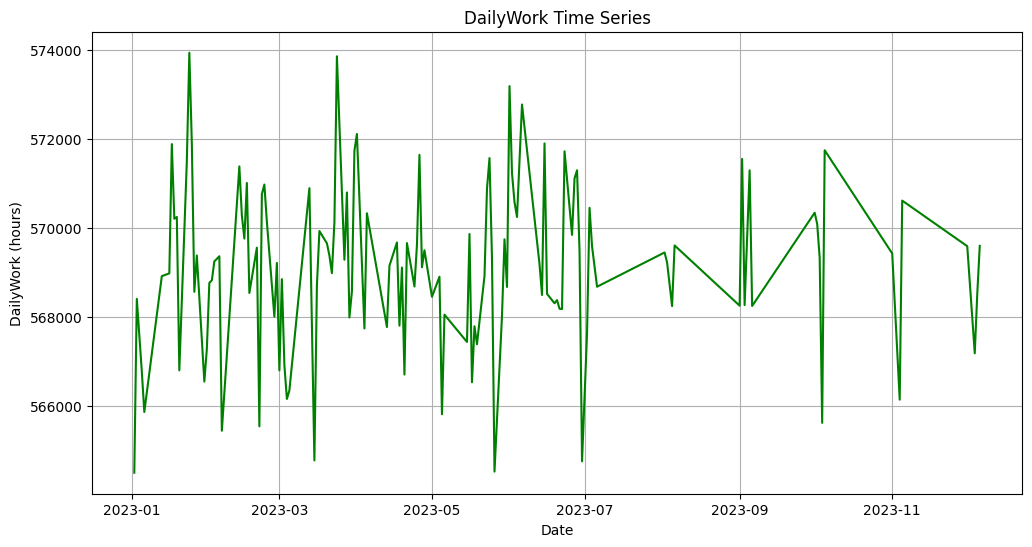

In [269]:
import matplotlib.pyplot as plt

def plot_pause_time_series(desired_employee_data):
    # Plot Pause as a time series
    plt.figure(figsize=(12, 6))
    plt.plot(desired_employee_data['Date'], desired_employee_data['Pause'], color='blue')
    plt.title('Pause Time Series')
    plt.xlabel('Date')
    plt.ylabel('Pause (hours)')
    plt.grid(True)
    plt.show()

def plot_daily_work_time_series(desired_employee_data):
    # Plot DailyWork as a time series
    plt.figure(figsize=(12, 6))
    plt.plot(desired_employee_data['Date'], desired_employee_data['DailyWork'], color='green')
    plt.title('DailyWork Time Series')
    plt.xlabel('Date')
    plt.ylabel('DailyWork (hours)')
    plt.grid(True)
    plt.show()
def plot_futer_daily_work_time_series(desired_employee_data):
    # Plot DailyWork as a time series
    plt.figure(figsize=(12, 6))
    plt.plot(desired_employee_data['Date'], desired_employee_data['DailyWork'], color='red')
    plt.title('DailyWork Time Series')
    plt.xlabel('Date')
    plt.ylabel('DailyWork (hours)')
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming 'desired_employee_data' is your DataFrame containing data for the desired employee

plot_daily_work_time_series(data)

In [270]:
data.drop(columns=['Pause'], inplace=True)
data

,Date,DailyWork
0,2023-01-02,564501.0
1,2023-01-03,568410.0
2,2023-01-05,566780.0
3,2023-01-06,565866.0
4,2023-01-13,568920.0
...,...,...
125,2023-11-05,570618.0
126,2023-12-01,569593.0
127,2023-12-04,567186.0
128,2023-12-05,568517.0


In [271]:
#!pip install statsmodels

In [272]:
data

,Date,DailyWork
0,2023-01-02,564501.0
1,2023-01-03,568410.0
2,2023-01-05,566780.0
3,2023-01-06,565866.0
4,2023-01-13,568920.0
...,...,...
125,2023-11-05,570618.0
126,2023-12-01,569593.0
127,2023-12-04,567186.0
128,2023-12-05,568517.0


In [273]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'data' is your DataFrame with 'Date' and 'DailyWork' columns
# Assuming 'n_test' is the number of data points you want to use for testing
n_test = 20
# Data Preparation
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
data.set_index('Date', inplace=True)

# Split Data
train_data = data.iloc[:-n_test]
test_data = data.iloc[-n_test:]

# Model Selection
model = ARIMA(train_data['DailyWork'], order=(5,1,0))  # Example order, you may need to tune this
model_fit = model.fit()

# Model Evaluation
predictions = model_fit.forecast(steps=n_test)
mse = mean_squared_error(test_data['DailyWork'], predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Prediction for Future Dates
future_dates = pd.date_range(start=data.index[-1], periods=50, freq='D')
future_predictions = model_fit.forecast(steps=50)

# Usage of the Model
print("Future Predictions:")
future_data = pd.DataFrame({'Date': future_dates, 'DailyWork_Predicted': future_predictions})
print(future_data)


c:\Users\jaki\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaki\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaki\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE): 1634.7254640176952
Future Predictions:
          Date  DailyWork_Predicted
110 2023-12-06        569482.164147
111 2023-12-07        569475.159788
112 2023-12-08        569467.158641
113 2023-12-09        569472.465747
114 2023-12-10        569472.655713
115 2023-12-11        569472.602509
116 2023-12-12        569472.535617
117 2023-12-13        569472.572398
118 2023-12-14        569472.573642
119 2023-12-15        569472.573269
120 2023-12-16        569472.572727
121 2023-12-17        569472.572983
122 2023-12-18        569472.572992
123 2023-12-19        569472.572989
124 2023-12-20        569472.572985
125 2023-12-21        569472.572987
126 2023-12-22        569472.572987
127 2023-12-23        569472.572987
128 2023-12-24        569472.572987
129 2023-12-25        569472.572987
130 2023-12-26        569472.572987
131 2023-12-27        569472.572987
132 2023-12-28        569472.572987
133 2023-12-29        569472.572987
134 2023-12-30        569472.

c:\Users\jaki\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jaki\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\jaki\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jaki\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next 

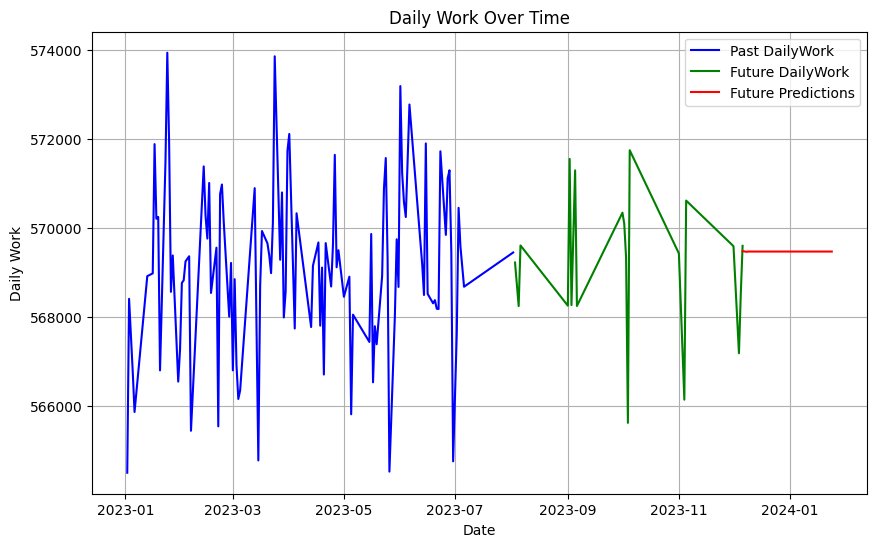

In [274]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Plot past data
plt.plot(data.index[:-n_test], data['DailyWork'][:-n_test], color='blue', label='Past DailyWork')

# Plot future data
plt.plot(data.index[-n_test:], data['DailyWork'][-n_test:], color='green', label='Future DailyWork')

# Plot future predictions
plt.plot(future_data['Date'], future_data['DailyWork_Predicted'], color='red', label='Future Predictions')

plt.title('Daily Work Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Work')
plt.legend()
plt.grid(True)
plt.show()

